# CREDIT CARD BANK CUSTOMERS SEGMENTATION USING UNSUPERVISED K-MEANS CLUSTERING ANALYSIS

## 1. Importing Python Libraries

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


print("Python Libraries Import Completed")

Python Libraries Import Completed


## 2. Data Import and Loading

In [2]:
# Importing the Credit Card Bank Customers Data stored in the csv file

raw_data = pd.read_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhya/~~~VP_Data_Science/DS_Real_Time_Projects/Credit_Card_Customers_Segmentation_Using_UnSupervised_K_Means_Clustering_Analysis/data/credit_card_customers.csv")

print("Raw Data Import Completed")

Raw Data Import Completed


## 3. Exploratory Data Analysis and Data Cleaning

In [3]:
# Displaying the Shape of the Raw Data

raw_data.shape

(8950, 18)

In [4]:
# Displaying the First 5 Data Instances of the Raw Data

raw_data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
# Displaying the Last 5 Data Instances of the Raw Data

raw_data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [6]:
# Displaying the Attributes/Columns in the Raw Data

raw_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
# Displaying the Data Types of the Attributes/Columns in the Raw Data

raw_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
# Displaying the Descriptive Statistics of all the Attributes/Columns in the Raw Data

raw_data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### 3.1 Identifying the Missing Values

In [9]:
# Displaying the Missing Values in the Raw Data

missing_values = raw_data.isna().sum()
missing_values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### As we can see from the above results; there are 313 missing values in the attribute named 'MINIMUM_PAYMENTS' 

### 3.2 Fixing and Cleaning the Missing Data

### As we have less number of missing data of about 313 in the attribute named 'MINIMUM_PAYMENTS' out of the total 8950 data instances; we can fix and clean the missing data values by applying the statistical approach and update the median value of the attribute named 'MINIMUM_PAYMENTS' to all the missing values.

### Please Note: As the attribute named 'MINIMUM_PAYMENTS' has extreme outlier data points; hence it is not advisable to update the missing values with the mean value as mean value is affected by the outliers in the dataset. Therefore; a statistical approach to update the missing values with the median value is applied in this case.

In [10]:
raw_data = raw_data.fillna(raw_data['MINIMUM_PAYMENTS'].median())

print("Execution Completed")

Execution Completed


In [11]:
# Verifying the Missing Values in the Raw Data after updating with the Median Values

raw_data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### As we can see from the above results; there are no missing values in the entire dataset.

### 3.3 Co-relation Between Various Features

In [12]:
# Displaying the Co-relation between the various attributes/features

corr_map = raw_data.corr()

corr_map

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531323           0.096173   0.356993   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.397920           0.131181   0.095789   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319744                0.256536   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.050256                0.134019   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.304009             0.119926   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140747             0.006154   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

### 3.4 Co-variance Between Various Features

In [13]:
# Displaying the Co-variance between the various attributes/features

raw_data.cov()

BALANCE  BALANCE_FREQUENCY  \
BALANCE                           4.332775e+06         158.988998   
BALANCE_FREQUENCY                 1.589890e+02           0.056124   
PURCHASES                         8.061523e+05          67.662970   
ONEOFF_PURCHASES                  5.678461e+05          41.023448   
INSTALLMENTS_PURCHASES            2.380664e+05          26.628521   
CASH_ADVANCE                      2.168214e+06          49.378593   
PURCHASES_FREQUENCY              -6.511934e+01           0.021843   
ONEOFF_PURCHASES_FREQUENCY        4.543585e+01           0.014306   
PURCHASES_INSTALLMENTS_FREQUENCY -5.227359e+01           0.016579   
CASH_ADVANCE_FREQUENCY            1.871258e+02           0.009097   
CASH_ADVANCE_TRX                  5.471365e+03           0.228864   
PURCHASES_TRX                     7.985774e+03           1.116684   
CREDIT_LIMIT                      4.024480e+06          82.907138   
PAYMENTS                          1.945257e+06          44.585787   
MINIMUM_PAYMENTS                  1.932213e+06          72.496775   
PRC_FULL_PAYMENT                 -1.941972e+02          -0.006589   
TENURE                            2.025045e+02           0.037976   

                                     PURCHASES  ONEOFF_PURCHASES  \
BALANCE                           8.061523e+05      5.678461e+05   
BALANCE_FREQUENCY                 6.766297e+01      4.102345e+01   
PURCHASES                         4.565208e+06      3.251657e+06   
ONEOFF_PURCHASES                  3.251657e+06      2.755228e+06   
INSTALLMENTS_PURCHASES            1.313723e+06      4.962960e+05   
CASH_ADVANCE                     -2.306495e+05     -1.090465e+05   
PURCHASES_FREQUENCY               3.370449e+02      1.765093e+02   
ONEOFF_PURCHASES_FREQUENCY        3.177167e+02      2.599284e+02   
PURCHASES_INSTALLMENTS_FREQUENCY  2.679795e+02      8.426529e+01   
CASH_ADVANCE_FREQUENCY           -5.137159e+01     -2.744721e+01   
CASH_ADVANCE_TRX                 -9.795351e+02     -5.234981e+02   
PURCHASES_TRX                     3.662376e+04      2.250879e+04   
CREDIT_LIMIT                      2.775604e+06      1.931295e+06   
PAYMENTS                          3.731605e+06      2.726109e+06   
MINIMUM_PAYMENTS                  4.774428e+05      1.946010e+05   
PRC_FULL_PAYMENT                  1.127304e+02      6.445843e+01   
TENURE                            2.467432e+02      1.425079e+02   

                                  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
BALANCE                                     2.380664e+05  2.168214e+06   
BALANCE_FREQUENCY                           2.662852e+01  4.937859e+01   
PURCHASES                                   1.313723e+06 -2.306495e+05   
ONEOFF_PURCHASES                            4.962960e+05 -1.090465e+05   
INSTALLMENTS_PURCHASES                      8.178274e+05 -1.218410e+05   
CASH_ADVANCE                               -1.218410e+05  4.398096e+06   
PURCHASES_FREQUENCY                         1.605865e+02 -1.814012e+02   
ONEOFF_PURCHASES_FREQUENCY                  5.774794e+01 -5.427847e+01   
PURCHASES_INSTALLMENTS_FREQUENCY            1.837934e+02 -1.475899e+02   
CASH_ADVANCE_FREQUENCY                     -2.394664e+01  2.637828e+02   
CASH_ADVANCE_TRX                           -4.567073e+02  9.396057e+03   
PURCHASES_TRX                               1.411968e+04 -3.954113e+03   
CREDIT_LIMIT                                8.442017e+05  2.319990e+06   
PAYMENTS                                    1.005576e+06  2.751800e+06   
MINIMUM_PAYMENTS                            2.827303e+05  6.885713e+05   
PRC_FULL_PAYMENT                            4.829291e+01 -9.381340e+01   
TENURE                                      1.042590e+02 -1.917325e+02   

                                  PURCHASES_FREQUENCY  \
BALANCE                                    -65.119343   
BALANCE_FREQUENCY                            0.021843   
PURCHASES                                  337.044946   
ONEOFF_PUR

### 3.5 Co-relation Heatmap Between Various Features

<AxesSubplot:>

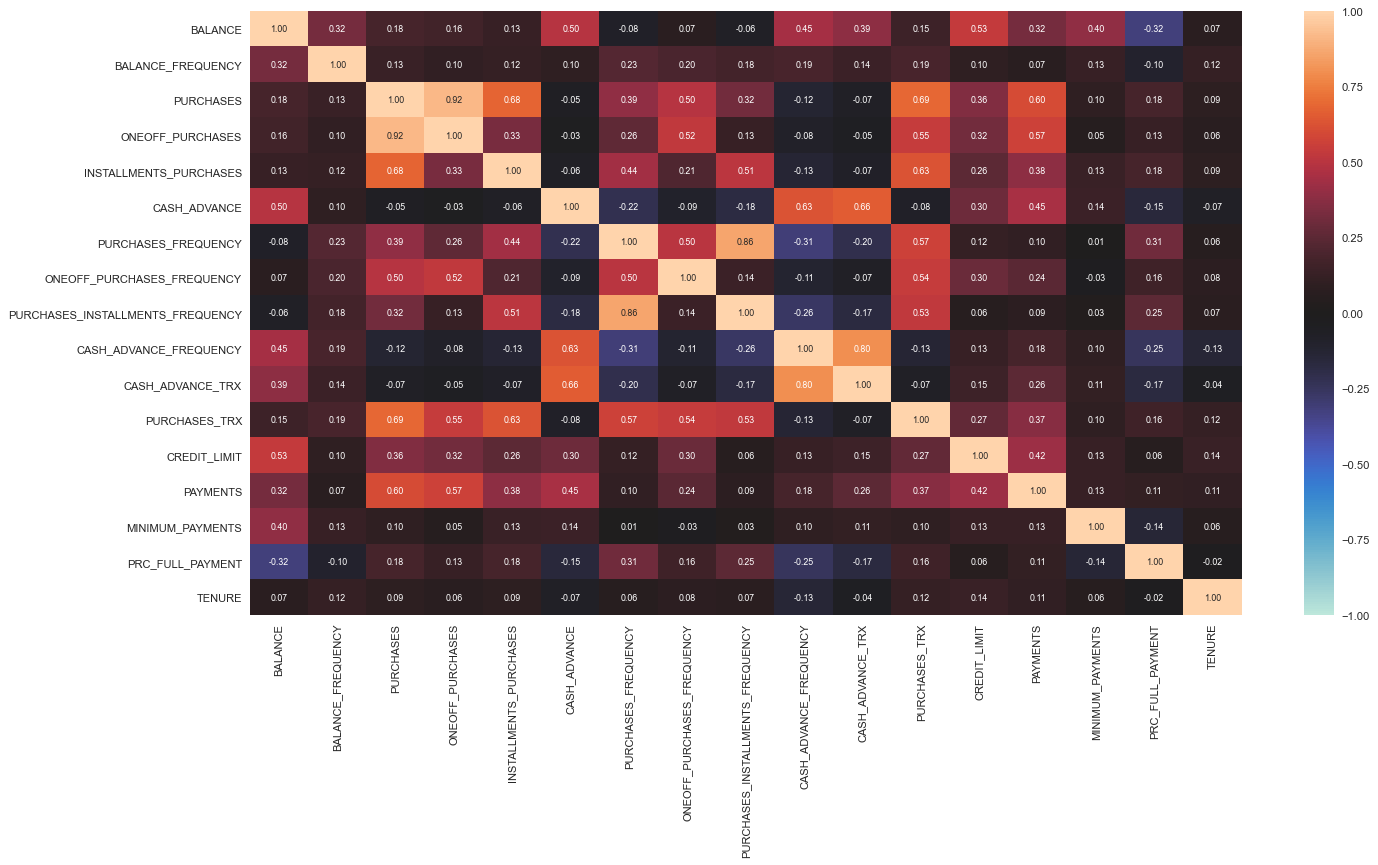

In [14]:
# Visualising the Co-relation Heatmap between the various attributes/features

plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(corr_map, vmin=-1, vmax=1, center=0, annot=True, annot_kws={'size':8}, fmt='.2f')

## 4. Data Pre-processing and Scaling

In [15]:
# Creating a copy of the Raw Data for Scaling Purposes

cust_data = raw_data.copy()
cust_data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [16]:
# Removing the Customer ID Columns from the 'cust_data' DataFrame

cust_data = cust_data.drop('CUST_ID', axis=1)
cust_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        312.343947          0.000000       6  
8947    81

In [17]:
# Creating a list of all the Required Features

features = []

for column in cust_data:
    features.append(column)
    
features

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

### Let's pro-process and scale all the feaures to represent them as values between -1 and +1 for normalisation purposes.

In [26]:
# Defining an Instance of the StandardScaler Function
scalar = StandardScaler()

# Scaling all the Features of the Customer Data
cust_data = scalar.fit_transform(cust_data)

# Displaying the Scaled Numpy Array
cust_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [27]:
# Converting the Numpy Array back to a Pandas DataFrame
cust_data = pd.DataFrame(cust_data, columns=features)

# Displaying the Pandas DataFrame with the Scaled Features
cust_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960234   
1                   0.573963          0.110074      -0.591796      0.688717   
2                  -0.675349         -0.476070      -0.109020      0.826129   
3                  -0.258913         -0.329534      -0.551565      0.826129   
4                  -0.675349         -0.476070      -0.551565     -0.905269   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960234   
8946               -0.675349         -0.476070      -0.350408     -0.960234   
8947               -0.675349         -0.476070      -0.390639     -0.960234   
8948                0.157527         -0.182998      -0.591796     -1.097647   
8949                0.990398         -0.182998       0.333524     -0.905269   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979         -0.302400         -0.525551  0.360680  
1     0.818642          0.097500          0.234227  0.360680  
2    -0.383805         -0.093293         -0.525551  0.360680  
3    -0.598688         -0.228307         -0.525551  0.360680  
4    -0.364368         -0.257266         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217         -0.341250          1.183951 -4.122768  
8946 -0.503396         -0.228307         -0.525551 -4.122768  
8947 -0.570615         -0.326875          0.329200 -

## 5. K-Means Clustering Model Fitting

## WCSS and Elbow Method - To Identify the Optimised Number of Clusters

### We will be applying the Within-Cluster-Sum-of-Squares (WCSS) Method and the Elbow Method to identify the appropriate optimised number of clusters.

### WCSS denotes the sum of the squared distance of each of the data instance/point within every cluster from its corresponding centroid/prototype.

### In sklearn python library; WCSS is calculated by the parameter named "inertia_" and the centroid is determined using the parameter named "cluster_centers_"

### 5.1 Defining the Initial Configuration of the K-Means Clustering Model

In [28]:
# Extracting the Data Values from the Scaled "Cust_Data" DataFrame

#cust_data_values = cust_data.values

# Defining the Number of Clusters Ranging from 1 to 20
clusters = range(1, 21)

# Defining an Empty List to Hold the Values of the Sum of the Squared Distances of the Data Points within each Cluster from it's Corresponding Centroid
WCSS = []

# K-Means Clustering Algorithm - Default Parameters Configuration
algorithm = 'auto'
copy_x = True, 
init = 'k-means++'
max_iter = 300
n_clusters = clusters
n_init = 10
n_jobs = None
precompute_distances = 'auto'
random_state = 0
tol = 0.0001
verbose = 0

print("K-Means Clustering Model - Initital Configuration Completed")

K-Means Clustering Model - Initital Configuration Completed


### 5.2 Fitting the K-Means Clustering Model for Various Number of Clusters

In [29]:
# Fitting the K-Means Clustering Model Based on the Various Parameters Configured

print("K-Means Model Fitting Started...\n")

for k in clusters:
    kmeans = KMeans(algorithm=algorithm, copy_x=copy_x, init=init, max_iter=max_iter,
                    n_clusters=k, n_init=n_init, random_state=random_state, 
                    tol=tol, verbose=verbose)
    kmeans = kmeans.fit(cust_data)
    WCSS.append(kmeans.inertia_)
    print("K-Means Model Fitting for {} Clusters Completed...".format(k))

print("\nK-Means Model Fitting Completed...")

K-Means Model Fitting Started...

K-Means Model Fitting for 1 Clusters Completed...
K-Means Model Fitting for 2 Clusters Completed...
K-Means Model Fitting for 3 Clusters Completed...
K-Means Model Fitting for 4 Clusters Completed...
K-Means Model Fitting for 5 Clusters Completed...
K-Means Model Fitting for 6 Clusters Completed...
K-Means Model Fitting for 7 Clusters Completed...
K-Means Model Fitting for 8 Clusters Completed...
K-Means Model Fitting for 9 Clusters Completed...
K-Means Model Fitting for 10 Clusters Completed...
K-Means Model Fitting for 11 Clusters Completed...
K-Means Model Fitting for 12 Clusters Completed...
K-Means Model Fitting for 13 Clusters Completed...
K-Means Model Fitting for 14 Clusters Completed...
K-Means Model Fitting for 15 Clusters Completed...
K-Means Model Fitting for 16 Clusters Completed...
K-Means Model Fitting for 17 Clusters Completed...
K-Means Model Fitting for 18 Clusters Completed...
K-Means Model Fitting for 19 Clusters Completed...
K-Mean

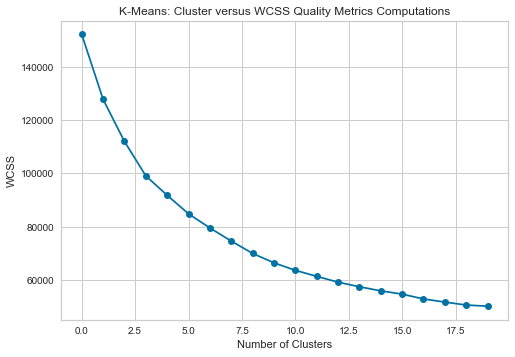

In [30]:
# Visualising the WCSS Method Results of the K-Means Clustering UnSupervised Algorithm

plt.plot(WCSS, 'bo-', label="WCSS")
plt.title("K-Means: Cluster versus WCSS Quality Metrics Computations")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Our objective in this business case is to identify the optimal number of clusters (k) which has minimum sum of squared distances.

### As we can see from the above WCSS and Elbow Method results; the optimal value of k looks to be either 3 or 4.

### Let's determine the appropriate value of k using the the quality metric named "Silhouette Coeffient/Score".

### 5.3 Silhouette Score Metric to Determine the Optimal Number of Clusters

### The best value of Silhouette Score is 1 and the worst value is -1. A value of 0 represents overlapping clusters. A negative value indicates that a sample is incorrectly assigned to a wrong cluster which appears similar to it.

In [31]:
# Silhouette Scores Computation

# Silhouette Score Function Parameters Configuraion

# Defining the Number of Clusters Ranging from 2 to 20
clusters = range(2, 21)

# Defining an Empty List to Hold the Values of the Silhouette Scores for the Various Number of Clusters
sil_score = []

X = cust_data
metric = 'euclidean'
sample_size = None
random_state = None

for k in clusters:
    kmeans2 = KMeans(algorithm=algorithm, copy_x=copy_x, init=init, max_iter=max_iter,
                    n_clusters=k, n_init=n_init, random_state=random_state, 
                    tol=tol, verbose=verbose)
    y_pred = kmeans2.fit_predict(cust_data)
    centres = kmeans2.cluster_centers_
    score = silhouette_score(X=X, labels=y_pred, metric=metric, sample_size=sample_size, random_state=random_state)
    sil_score.append(score)
    print("Number of Clusters is {} and Silhouette Score is {}".format(k, score))
    #print("Cluster Centres are: ", centres)
    

Number of Clusters is 2 and Silhouette Score is 0.20951476157103777
Number of Clusters is 3 and Silhouette Score is 0.2506122909688239
Number of Clusters is 4 and Silhouette Score is 0.19768079189337903
Number of Clusters is 5 and Silhouette Score is 0.19325258230707543
Number of Clusters is 6 and Silhouette Score is 0.20254173180615556
Number of Clusters is 7 and Silhouette Score is 0.20803591262104582
Number of Clusters is 8 and Silhouette Score is 0.22173256360999913
Number of Clusters is 9 and Silhouette Score is 0.22638319400232124
Number of Clusters is 10 and Silhouette Score is 0.2190443516105076
Number of Clusters is 11 and Silhouette Score is 0.21633694073006146
Number of Clusters is 12 and Silhouette Score is 0.21640516975958535
Number of Clusters is 13 and Silhouette Score is 0.2213150210724897
Number of Clusters is 14 and Silhouette Score is 0.19811685869051518
Number of Clusters is 15 and Silhouette Score is 0.2005527426762388
Number of Clusters is 16 and Silhouette Score 

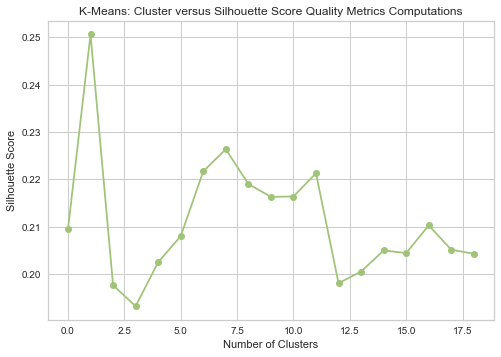

In [32]:
# Matplot - Visualising the Silhouette Scores for the various Number of Clusters of the K-Means Clustering UnSupervised Algorithm

plt.plot(sil_score, 'go-', label="Silhouette Scores")
plt.title("K-Means: Cluster versus Silhouette Score Quality Metrics Computations")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### As we can see from the above results; all the clusters configurations have Silhouette Score as a non-zero value and a positive value. Hence we can say that there are no overlapping clusters and/or no clusters where samples are incorrectly grouped. 

In [33]:
# Yellowbrick - Visualising the Elbow Method Metrics and Silhouette Scores for the various Number of Clusters of the K-Means Clustering UnSupervised Algorithm

# Initialising and Defining a K-Means Model
kmeans3 = KMeans()

# Initialising and Defining a Elbow Visualizer
elbow_visualizer = KElbowVisualizer(kmeans3, k=(2, 21), metric='silhouette', timings=True)

# Fitting the Model
elbow_visualizer.fit(cust_data)

# Visualizing the Results
elbow_visualizer.show()


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

### We can conclude from the above Elbow Method and Silhouette Scores Metrics; that the total number of clusters as 3 has a highest value of Silhouette Score and hence can be confirmed to be an optimised value of k.

## 6. Optimised Number of Clusters - Final K-Means Model

### 6.1 Silhouette Visualizer - Visualizing the Finanlised Clusters Based on the Silhouette Coefficients/Scores

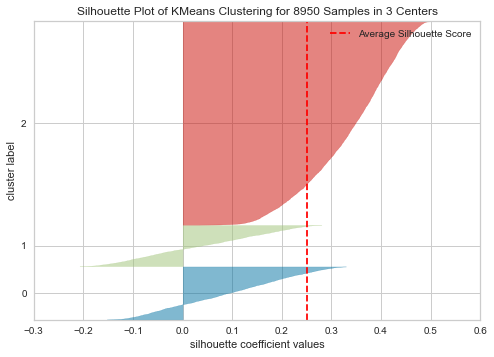

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# Silhouette Visualizer - Visualizing the Finanlised Clusters Based on the Silhouette Coefficients/Scores

# Initialising and Defining a K-Means Model
kmeans4 = KMeans(3)

# Initialising and Defining a Silhouette Visualizer
Silhouette_visualizer = SilhouetteVisualizer(kmeans4, colors='yellowbrick')

# Fitting the Model
Silhouette_visualizer.fit(cust_data)

# Visualizing the Results
Silhouette_visualizer.poof()

### 6.2 Seaborn Pair Plot Visualizer - Visualizing the Finalised Clusters - Final K-Means Model

In [68]:
# K-Means Clustering Finalised Model - Parameters Configuration

# K-Means Clustering Algorithm - Default Parameters Configuration
algorithm = 'auto'
copy_x = True, 
init = 'k-means++'
max_iter = 300
n_clusters = 3
n_init = 10
n_jobs = None
precompute_distances = 'auto'
random_state = 0
tol = 0.0001
verbose = 0

print("K-Means Clustering Model - Initital Configuration Completed")

K-Means Clustering Model - Initital Configuration Completed


In [51]:
# Fitting the K-Means Clustering Finalised Model Based on the Finalised Parameters Configured

print("K-Means Finalised Model Fitting Started...")


kmeans_final = KMeans(algorithm=algorithm, copy_x=copy_x, init=init, max_iter=max_iter,
                      n_clusters=n_clusters, n_init=n_init, random_state=random_state, 
                      tol=tol, verbose=verbose)

# Fitting the Finalised K-Means Model and Retrieving the Cluster Predictions Outcomes
y_pred_final = kmeans_final.fit_predict(cust_data)

print("K-Means Finalised Model Fitting Completed...")

K-Means Finalised Model Fitting Started...
K-Means Finalised Model Fitting Completed...


In [52]:
# Displaying all the Cluster Predicted Labels for all the Samples

kmeans_final.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [53]:
# Appending the Final Predictions Cluster Labels to the Original Non-Sclaed Raw DataFrame

raw_data["Cluster Labels"] = y_pred_final

# Displaying the Final Data Frame with Cluster Labels Predictions Appended
raw_data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster Labels  
0      201.802084        139.509787          0.000000      12               0  
1     4103.032597       1072.340217          0.222222      12               1  
2      622.066742        627.284787          0.000000      12               0  
3        0.000000        312.343947          0.000000      12               0  
4      678.334763        244.791237          0.000000      12               0  
...  

In [54]:
# Extracting all the Required Features/Columns as a List By Excluding the "CUST_ID" Column

columns = list(raw_data.columns[1:])
columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Cluster Labels']

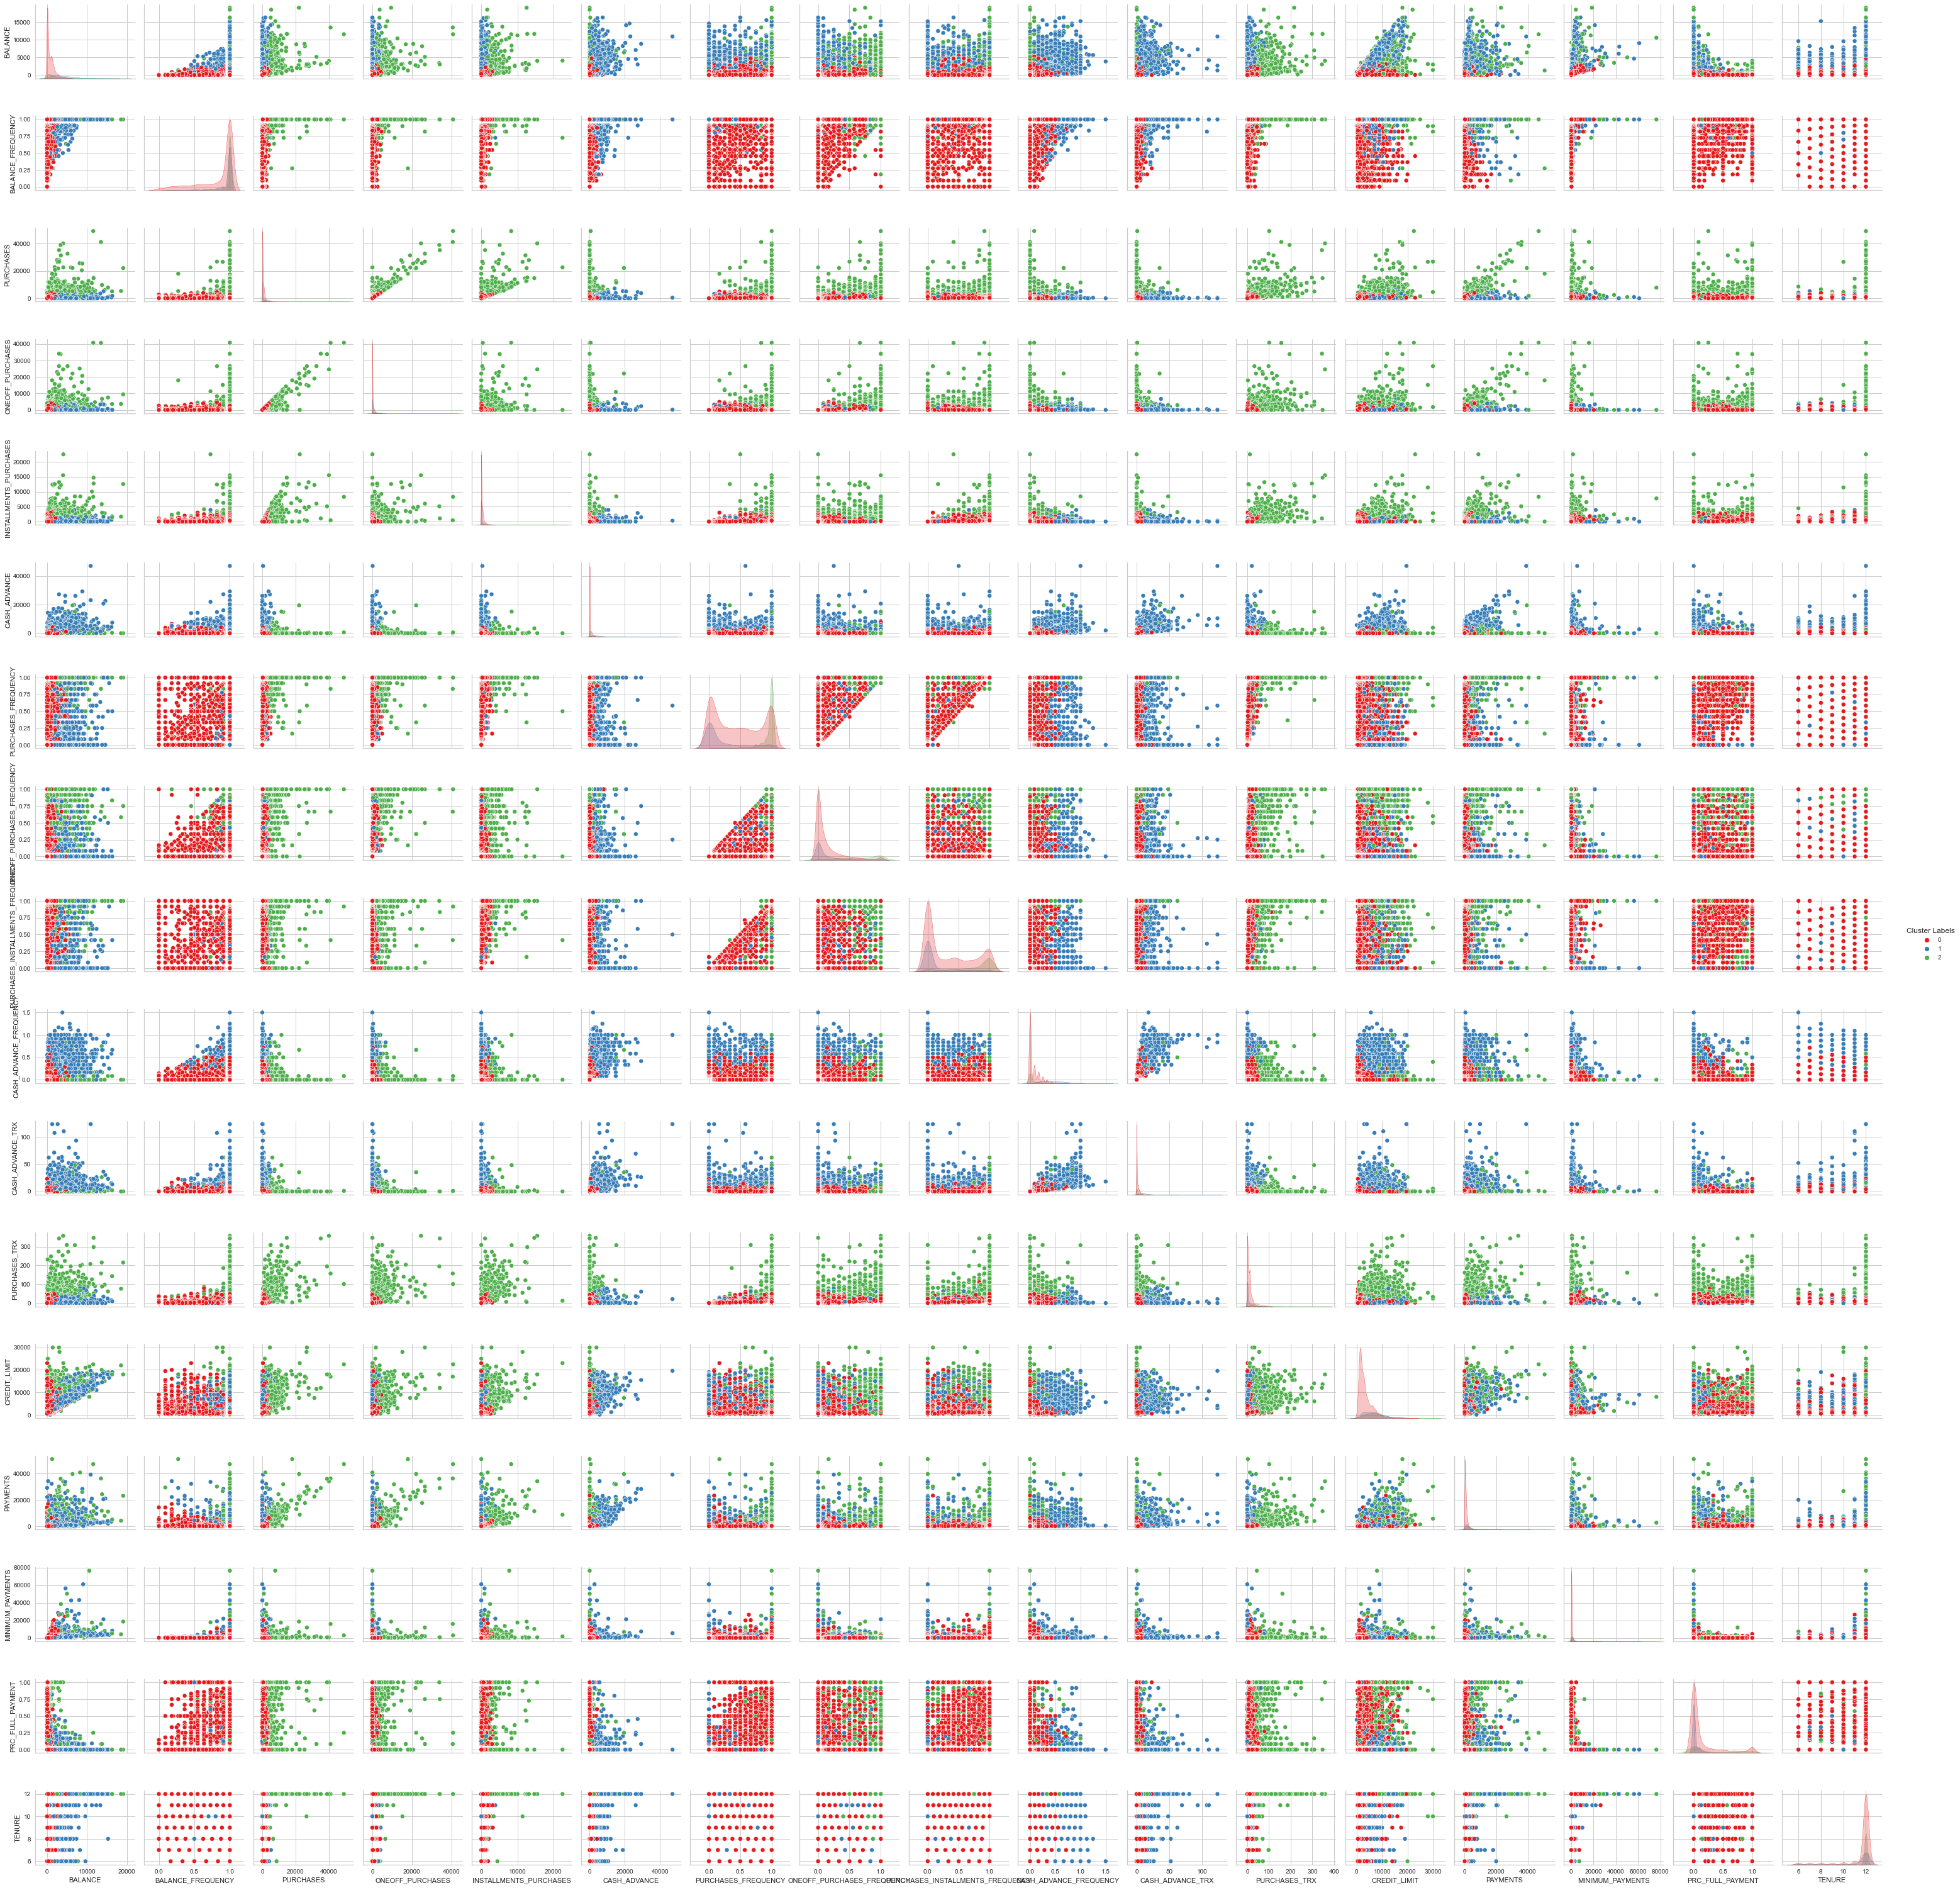

In [56]:
# Seaborn Pair Plot - Visualization for all the Required Features

sns.pairplot(raw_data[columns], hue='Cluster Labels', palette='Set1')

## 7. Business Scenarios - Visualisations and Interpretations

In [ ]:
# K-Means Clustering Finalised Model - Parameters Configuration - Business Scenario 1

# K-Means Clustering Algorithm - Default Parameters Configuration
algorithm = 'auto'
copy_x = True, 
init = 'k-means++'
max_iter = 300
n_clusters = 3
n_init = 10
n_jobs = None
precompute_distances = 'auto'
random_state = 0
tol = 0.0001
verbose = 0

print("K-Means Clustering Model - Initital Configuration Completed")


### 7.1 Business Scenario 1 - BALANCE versus PURCHASES

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

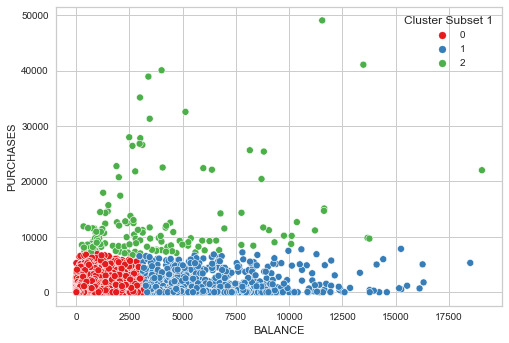

In [77]:
# Seaborn Scatter Plot - Visualization - Business Scenario 1

subset_columns_1 = ['BALANCE', 'PURCHASES']

kmeans_final_subset_1 = KMeans(algorithm=algorithm, copy_x=copy_x, init=init, max_iter=max_iter,
                               n_clusters=n_clusters, n_init=n_init, random_state=random_state, 
                               tol=tol, verbose=verbose)

# Fitting the Finalised K-Means Model and Retrieving the Cluster Predictions Outcomes
y_pred_final_subset_1 = kmeans_final_subset_1.fit_predict(cust_data[subset_columns_1])

raw_data['Cluster Subset 1'] = y_pred_final_subset_1

subset_columns_1.append('Cluster Subset 1')

sns.scatterplot(raw_data['BALANCE'], raw_data['PURCHASES'], hue=raw_data['Cluster Subset 1'], palette='Set1')

In [107]:
# Verifying the Count and the Percentages of the Customers in each of the 3 Clusters/Labels

cluster_labels_unique = pd.unique(raw_data['Cluster Subset 1'])

cluster_cust_count = raw_data['Cluster Subset 1'].value_counts()

total_cust_count = cluster_cust_count[cluster_labels_unique[0]] + cluster_cust_count[cluster_labels_unique[1]] + cluster_cust_count[cluster_labels_unique[2]]

#print("Total Customer in Cluster Label 0: ", cluster_cust_count[cluster_labels_unique[0]])
#print("Total Customer in Cluster Label 1: ", cluster_cust_count[cluster_labels_unique[1]])
#print("Total Customer in Cluster Label 2: ", cluster_cust_count[cluster_labels_unique[2]])

for k in range(0, len(cluster_labels_unique)):
    k_cust_percentage = (cluster_cust_count[k]/total_cust_count)*100
    k_cust_percentage_rounded = round(k_cust_percentage, 0)
    print("\nTotal Customers in Cluster Label {}: {}".format(k, cluster_cust_count[cluster_labels_unique[k]]))
    print("Total % of Customers in Cluster Label {}: {}%".format(k, k_cust_percentage_rounded))



Total Customers in Cluster Label 0: 7533
Total % of Customers in Cluster Label 0: 84.0%

Total Customers in Cluster Label 1: 1272
Total % of Customers in Cluster Label 1: 14.0%

Total Customers in Cluster Label 2: 145
Total % of Customers in Cluster Label 2: 2.0%


### We can infer below points from the above scatter plot

> ### 1. High Spenders wit Low Balance (Red Label Customers): There is a maximum number of customers of about 84% who are high spenders and exhibited low purchasing characteristics.

> ### 2. Medium to Low Spenders (Blue Label Customers): There is a noticeable number of customers of about 14% who are medium to low spenders and exhibited low purchasing characteristics.

> ### 3. High to Medium Spenders (Green Label Customers): There is a minimal number of customers of about 2% who are high to medium spenders and exhibited medium to high purchasing characteristics.
        

### 7.2 Business Scenario 2 - BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS

In [109]:
# Seaborn Pair Plot - Visualization - Business Scenario 2

subset_columns_2 = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

kmeans_final_subset_2 = KMeans(algorithm=algorithm, copy_x=copy_x, init=init, max_iter=max_iter,
                               n_clusters=n_clusters, n_init=n_init, random_state=random_state, 
                               tol=tol, verbose=verbose)

# Fitting the Finalised K-Means Model and Retrieving the Cluster Predictions Outcomes
y_pred_final_subset_2 = kmeans_final_subset_2.fit_predict(cust_data[subset_columns_2])

raw_data['Cluster Subset 2'] = y_pred_final_subset_2

subset_columns_2.append('Cluster Subset 2')

sns.pairplot(raw_data[subset_columns_2], hue='Cluster Subset 2', palette='Set1')

### As we can see from the above results; there exists multiple interpretations for the various combinations of the input features.